<img src="pds_banner.png" style="height:200px">

# Laboratorio 1 Procesamiento de señales 2019-2

# Diferencias entre Transmisión Analoga vs. Digtal



---
## Introducción

En este laboratorio se pretende comparar técnicas de transmisión análoga vs. digital, y mostrar las potenciales ventajas de la transmisión de señales digitales respecto a su contra-parte análoga.


<img src="img1.png" style="height:200px">

Se considerará el caso de la transmisión de una señal sobre un medio confinado de gran longitud, en el cual varios repetidores serán usados para compensar la atenuación introducida por el canal.

<img src="img2.png" style="height:200px">


Cada segmento del medio introduce una atenuación $1/G$, por lo cual se puede recobrar la amplitud original adicionando un repetidor de ganancia $G$. Sin embargo, si la señal ha acumulado ruido aditivo, el ruido también será amplificado por el repetidor. 

<img src="img3.png" style="height:200px">

Después de $N$ repetidores, el ruido será amplificado $N$ veces, y la señal en el receptor será.

<img src="img4.png" style="height:200px">



Por otro lado si se usa una señal digital, se puede establecer un umbral después de cada repetidor y eliminar el ruido en cada etapa.




<img src="img5.png" style="height:200px">





### Transmisión de datos transatlanticos: curiosidades



1. 1866: lineas de telegráfo. 8 palabras por minuto (≈5 bps)
2. 1956: AT&T instala cable coaxial. 48 canales de voz para transmisión telefónica (≈3 Mbps)
3. 2005: Alcatel Tera10. Fibra óptica. 8.4Tbps (8.4x10^12)
4. 2012: fibra óptica. 60Tbps

5. Colombia
https://www.mintic.gov.co/portal/604/w3-article-8920.html

<img src="img6.png" style="height:600px">


## Procedimiento: parte I

### Importar dependencias

In [1]:
from scipy.io.wavfile import read
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

 ### Cargue, grafique, y escuche la señal de audio que acompaña esta guía

In [2]:
fs, x=read("Frase_480002.wav")

# estandarización de la señal de audio
x=x-np.mean(x) # eliminar nivel DC
x=x/np.max(np.abs(x)) # normalizar en amplitud a 0dB
Audio(x, rate=fs)

### Creación de la señal analógica

La versión de señal análoga será una simulación donde se usarán valores flotantes con el fin de acercarnos a una precisión infinita. Para ello se va a re-escalar el audio cargado en la parte anterior entre -100 y 100, de la siguiente forma. 


In [3]:
norm = 1.0 / max(np.absolute([min(x), max(x)]))
sA = 100.0 * x * norm

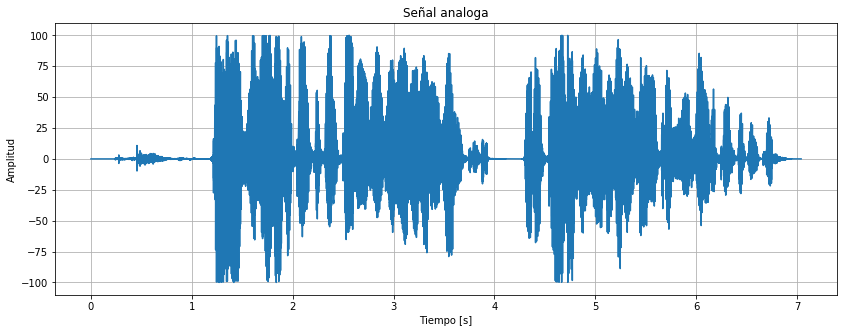

In [4]:
plt.figure(figsize=(14,5))
t=np.arange(len(sA))/fs
plt.plot(t,sA)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.title("Señal analoga")
plt.show()

### Creación de la señal digital

La señal digital será simplemente una versión redondeada de la señal análoga, usando números enteros entre -100 y 100 para obtener una resolución aproximada de 8 bits por muestra. Use la instrucción ```np.round()``` para obtener la señal digital a partir de la señal análoga.

In [5]:
sD=np.round(sA)

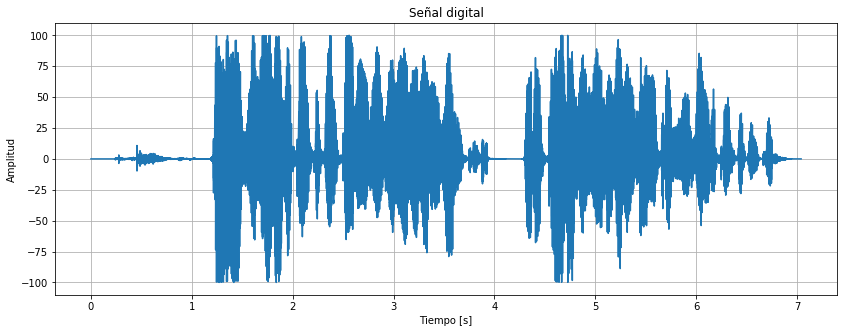

In [6]:
plt.figure(figsize=(14,5))
t=np.arange(len(sA))/fs
plt.plot(t,sA)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.title("Señal digital")
plt.show()

<span style="color:red">Pregunta: ¿Por qué los valores enteros entre -100 y 100 nos dan aproximadamente 8 bits de cuantización? </span>

Escuche con unos auriculares y grafique las señales análoga y digital obtenidas.

In [7]:
Audio(sA, rate=fs)

In [8]:
Audio(sD, rate=fs)

 <span style="color:red">Pregunta: ¿Qué diferencias puede percibir entre las señales analoga y digital?</span>

### Error de digitalización

Grafique el error debido a la digitalización de la señal.

Para el calculo del error se puede restar las dos señales y luego calcular el valor absoluto ```np.abs(sA-sD)```

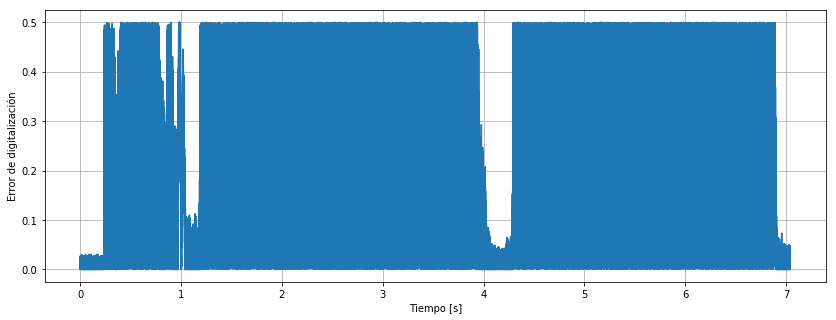

In [9]:
error=np.abs(sA-sD)
plt.figure(figsize=(14,5))
t=np.arange(len(error))/fs
plt.plot(t,error)
plt.xlabel("Tiempo [s]")
plt.ylabel("Error de digitalización")
plt.grid()
plt.show()

 <span style="color:red">Pregunta: ¿Entre que rango se espera se encuentre el error, y Cómo se puede reducir?</span>

### Relación señal a ruido

Calcule la relación señal a ruido entre la señal digital y la señal análoga. Para ello puede usar la siguiente función.


In [10]:
def SNR(noisy, original):
    # power of the error
    err = np.linalg.norm(original-noisy)
    # power of the signal
    sig = np.linalg.norm(original)
    # SNR in dBs
    return 10 * np.log10(sig/err)

In [11]:
SNRdig=SNR(sD, sA)

print("La relacion señal a ruido es de "+str(SNRdig)+" dB")

La relacion señal a ruido es de 18.320632727659522 dB


 <span style="color:red">Pregunta: ¿Cuanto es la SNR?, ¿Se puede escuchar esa diferencia entre los audios?</span>

## Procedimiento parte II

Ahora se va a definir una función que represente el efecto de la transmisión de audio sobre un medio confinado terminado por un repetidor, realizando los siguientes pasos, en ese orden.


1. La señal es atenuada un factor $a<1$
2. La señal acumula ruido aditivo con determinada amplitud ($<1$) que se propaga a través del medio.
3. La señal es amplificada en el repetidor ($1/a$) hasta obtener la amplitud original.



### Creacion del repetidor

Cree una función llamada ```repeater(...)``` que reciba como entrada la señal a transmitir, la amplitud del ruido que se desea agregar, y la constante de atenuación, y retorne la señal afectada por el ruido, la atenuación, y amplificada nuevamente. 

para crear el ruido aditivo use la siguiente instrucción:

```Noise=np.random.uniform(-noise_amplitude, noise_amplitude, len(x))```

Siendo $x$ la señal a transmitir.


In [12]:
def repeater(x, noise_amplitude, attenuation):
    x=x*attenuation
    Noise=np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    x=x+Noise
    x=x/attenuation
    return x
    

### Transmisión analoga

La transmisión análoga no es más que una secuencia de repetidores, la cual puede ser implementada con la siguiente función.

In [13]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

### Transmisión digital

Para la señal digital, sin embargo se puede volver a cuantizar la señal después de cada repetidor, ya que sabemos que sólo tiene valores enteros. para esto se tiene la siguiente función.


In [14]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

<span style="color:red"> Compare los esquemas de transmisión de las señales. .</span>
    
<span style="color:red"> Para ello defina el número de repetidores, la amplitud del ruido, y la constante de atenuación. </span>


<span style="color:red"> Luego realice la transmisión de las señal análoga y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido tanto para la señal análoga como digital, respecto a la señal transmitida originalmente. 
    
<span style="color:red">    Escuche ambas señales luego de la transmisión.</span>


Comience con los siguientes parámetros.

1. Número de repetidores=70
2. Amplitud de Ruido=0.2
3. Atenuación=0.5

<span style="color:red">Manteniendo la amplitud de ruido, y la constante de atenuación constante, realice un barrido del número de repetidores entre 10 y 150 (puede hacerlo de 10 en 10). Realice nuevamente la transmisión análoga y digital y calcule la SNR para cada una. Al final grafique la SNR en función del número de repetidores.
¿Que se puede concluir? </span>


<span style="color:red">Realice el mismo procedimiento cambiando la amplitud del ruido entre 0 y 1, y manteniendo los otros parámetros constantes (número de repetidores y atenuación)</span>

<span style="color:red">Realice el mismo procedimiento cambiando la constante de atenuación (entre 0 y 1), manteniendo los demás parámetros constantes. ¿Qué puede concluir?</span>

## Bonus

<span style="color:red">Varíe al mismo tiempo dos de los parámetros y genere una grafica de superficie en 3D donde los ejes X y Y corresponden a la variación de los parámetros, y el eje Z es la SNR.</span>